This coding book is organized by the weeks that codes are from as we covered similar topic each week.  

# Week-4 Counting Words & Phrases

## Exploring the data

First, I will explore the data by counting words and phrases, using the codes from the week 4 to gain better insight into how to preprocess the data. 

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

### Loading the raw data
This data include 934 psychology abstracts that are published from 1977 to 2019.

In [2]:
df = pandas.read_csv('combined_removed.csv')

### Tokenizing
I need to tokenize the data to examine the frequency.

In [3]:
nlp = spacy.load("en")

In [4]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [5]:
# Making a 'tokenized_text' column 
df['tokenized_text']=df['Abstract'].apply(lambda x: word_tokenize(x))

### Making one list of words including the entire dataset

In [6]:
list_token=df['tokenized_text']

In [7]:
new_list = [' '.join(i) for i in list_token]

In [8]:
tokenized_sents = [word_tokenize(i) for i in new_list]
for i in tokenized_sents:
    print (i)

['Presented', '180', 'Hawaiian', 'Japanese', 'Japanese', 'and', 'Australian', 'undergraduates', 'with', 'a', 'slide', 'depicting', 'either', 'a', 'Japanese', 'or', 'a', 'Caucasian', 'couple', 'and', 'asked', 'them', 'to', 'describe', '3', 'ways', 'in', 'which', 'the', '2', 'persons', 'in', 'the', 'picture', 'were', 'similar', 'The', 'dependent', 'variable', 'was', 'ethnic', 'role', 'salience', 'measured', 'in', 'terms', 'of', 'the', 'frequency', 'and', 'rank', 'order', 'of', 'ethnic', 'trait', 'references', 'appearing', 'spontaneously', 'in', 'the', 'descriptions', 'Contrary', 'to', 'orthodox', 'role', 'theory', 'but', 'as', 'predicted', 'by', 'W.', 'I.', 'McGuire', 'and', 'A.', 'Padawer', 'Singer', "'s", 'see', 'record', 'rid]1976', '26089', '001[/rid', 'distinctiveness', 'theory', 'of', 'selective', 'perception', 'the', 'Japanese', 'described', 'the', 'Caucasian', 'but', 'not', 'the', 'Japanese', 'couple', 'in', 'ethnic', 'terms', 'the', 'Australians', 'described', 'the', 'Japanese',

In [9]:
flat_token = [inner
                for outer in tokenized_sents
                     for inner in outer]

### Concordance

In [10]:
import nltk
whText = nltk.Text(flat_token)

whitehouseIndex = nltk.text.ConcordanceIndex(whText) 
whitehouseIndex.print_concordance('culture')


Displaying 25 of 498 matches:
n potency activity extraversion and culture Factor analyses were conducted sepa
4 groups are considered in light of culture related interventions Mental health
nced during resettlement Losses and culture shock often led to anxiety and depr
mited previous exposure to American culture Successful adaptational strategies 
members and at easing the impact of culture shock and adjustment difficulties 5
egree of social support in Japanese culture may contribute to the low rate of h
ricans who retain their traditional culture Preliminary findings indicate that 
ical environment that constitutes a culture 's caretaking practices 9 ref Attem
 bereaved person from an unfamiliar culture is suffering bad grief Also address
y examined the influence of the new culture on Indian immigrant mothers in the 
ngs confirm the effects of American culture on the maternal attitudes of Indian
unction among refugees are reviewed culture shock rapid adaptation status disju
f bicultur

In [11]:
import nltk
whText = nltk.Text(flat_token)

whitehouseIndex = nltk.text.ConcordanceIndex(whText) 
whitehouseIndex.print_concordance('Asian')


Displaying 25 of 1340 matches:
ions may affect the mental health of Asian Americans racism maladjustment and s
ization of mental health services by Asian Americans e.g. their conceptions of 
lth facilities by Hispanic Americans Asian Americans Native Americans and Black
ervations of a group of 56 Southeast Asian refugee patients aged 13–73 yrs who 
approach for work with the Southeast Asian refugees The focus of therapeutic in
erica Black ethnic Chinese Southeast Asian refugee Haitian Italian Greek and Sp
udes of White Canadians toward South Asian SA immigrants by examining value dif
he cultural milieu of the individual Asian Black and White American students ju
n to the host culture in the case of Asian Americans and of the influence of st
on counseling and psychotherapy with Asian Americans and discusses research nee
hotherapy involve the personality of Asian Americans language problems the accu
h of the categories with examples in Asian American Mexican American Black Amer
 and mino

In [12]:
whText.common_contexts(['culture'])

and_factor of_related and_shock american_successful of_shock
japanese_may traditional_preliminary a_'s unfamiliar_is new_on
american_on reviewed_shock host_in and_specific a_compatible
three_compatibility host_ss foreign_the minority_or mainstream_the


In [13]:
whText.common_contexts(['Asian'])

of_americans by_americans americans_americans southeast_refugee
southeast_refugees south_sa individual_black with_americans
in_american 16_and permeating_cultures of_ethnic did_parents
and_american an_group male_adolescents the_female males_females
and_pacific in_cultures


## Preprocessing the data
The ultimate goal of this part is to know what words need to be merged as one expression. For instance, "Asian" needs to be distinguished from "Asian American" since they indicate different population. To locate collocations, the corpus need to be processed first by removing insignificant high-frequency words and normalizing the data.

### High-frequency words

In [14]:
#Adding word frequency as a column
df['word_counts'] = df['tokenized_text'].apply(lambda x: len(x))


In [15]:
countsDict = {}
for word in df['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('and', 6494),
 ('the', 5727),
 ('of', 5688),
 ('in', 3242),
 ('to', 3077),
 ('a', 1922),
 ('that', 1506),
 ('for', 1345),
 ('Asian', 1340),
 ('with', 1258),
 ('were', 1132),
 ('The', 992),
 ('on', 984),
 ('as', 859),
 ('is', 843),
 ('are', 782),
 ('American', 774),
 ('cultural', 766),
 ('was', 738),
 ('their', 738),
 ('by', 659),
 ('from', 639),
 ('Americans', 602),
 ('more', 557),
 ('ethnic', 546),
 ('than', 518),
 ('groups', 507),
 ('culture', 498),
 ('study', 497),
 ('be', 479),
 ('social', 465),
 ('an', 451),
 ('between', 445),
 ('among', 440),
 ('this', 436),
 ('self', 435),
 ('Chinese', 417),
 ('differences', 415),
 ('health', 404),
 ('students', 402),
 ('or', 391),
 ('not', 372),
 ('This', 355),
 ('research', 339),
 ('group', 321),
 ('In', 303),
 ('have', 301),
 ('these', 300),
 ('women', 293),
 ('racial', 292)]

As expected, there are many high-frequency words, such as 'and', 'the', 'of', 'in', and etc., that do not add any meaning to the analysis. I will remove these by normalizing the texts

### Normalizing the texts

In [16]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [17]:
df['normalized_tokens'] = df['tokenized_text'].apply(lambda x: normalizeTokens(x))
df['normalized_tokens_count'] = df['normalized_tokens'].apply(lambda x: len(x))

In [18]:
countsDict = {}
for word in df['normalized_tokens'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('asian', 1341),
 ('study', 861),
 ('group', 839),
 ('cultural', 810),
 ('american', 774),
 ('culture', 769),
 ('americans', 602),
 ('ethnic', 572),
 ('social', 486),
 ('difference', 486),
 ('self', 478),
 ('health', 446),
 ('student', 442),
 ('result', 425),
 ('chinese', 417),
 ('examine', 395),
 ('research', 371),
 ('white', 362),
 ('family', 350),
 ('high', 346),
 ('child', 326),
 ('woman', 323),
 ('racial', 309),
 ('relationship', 305),
 ('identity', 297),
 ('factor', 294),
 ('report', 294),
 ('experience', 287),
 ('participant', 284),
 ('support', 265),
 ('finding', 263),
 ('suggest', 261),
 ('effect', 252),
 ('measure', 250),
 ('use', 250),
 ('model', 243),
 ('find', 242),
 ('european', 242),
 ('individual', 236),
 ('value', 235),
 ('age', 234),
 ('level', 232),
 ('behavior', 223),
 ('acculturation', 223),
 ('=', 223),
 ('analysis', 221),
 ('influence', 221),
 ('relate', 213),
 ('black', 208),
 ('race', 208)]

Now, the meaningless functional words are removed from the data. 

### Collocations
Some words should be combined as one expression as they have unique meaning when used together. Therefore, I will locate some collocations that will be preprocessed as one phrase. 

In [19]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(whBigrams.N))


There are 86119 bigrams in the finder


In [20]:
def bigramScoring(count, wordsTuple, total):
    return count

print(whBigrams.nbest(bigramScoring, 10))

[('asian', 'american'), ('asian', 'americans'), ('ethnic', 'group'), ('n', '='), ('mental', 'health'), ('cultural', 'difference'), ('european', 'americans'), ('united', 'states'), ('study', 'examine'), ('east', 'asian')]


In [21]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:100]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('n', '='), 1790.2227326084474),
 (('united', 'states'), 1511.3436101671468),
 (('asian', 'american'), 1339.3028290654947),
 (('asian', 'americans'), 1306.0806141418702),
 (('mental', 'health'), 1192.5263808696463),
 (('ethnic', 'group'), 953.5577574670092),
 (('hong', 'kong'), 857.733382287404),
 (('college', 'student'), 766.6155713600484),
 (('european', 'americans'), 712.5364804768749),
 (('self', 'esteem'), 673.7477156672007),
 (('pacific', 'islander'), 595.0274219971357),
 (('et', 'al'), 580.0873262431096),
 (('cultural', 'difference'), 564.4850659769708),
 (('east', 'asian'), 519.8439628227466),
 (('african', 'american'), 514.5623612641089),
 (('cross', 'cultural'), 510.7428165817661),
 (('african', 'americans'), 498.3593757613344),
 (('finding', 'suggest'), 498.2866986870927),
 (('health', 'care'), 497.74153173202683),
 (('south', 'asian'), 494.22724839398734),
 (('racial', 'ethnic'), 487.9582522672927),
 (('european', 'american'), 482.69445813793203),
 (('study', 'examine'), 

In [22]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(df['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('american', 'college', 'student'), 5.3842140069585565),
 (('mental', 'health', 'service'), 5.291217481864822),
 (('americans', 'european', 'americans'), 5.096700390939812),
 (('asian', 'pacific', 'islander'), 4.898873189378797),
 (('americans', 'asian', 'americans'), 4.885603734331526),
 (('hong', 'kong', 'chinese'), 4.795798602444222),
 (('racial', 'ethnic', 'group'), 4.791662305404022),
 (('asian', 'international', 'student'), 4.689001530484332),
 (('mean', 'age', 'yrs'), 4.582518438727755),
 (('asian', 'americans', 'european'), 4.57682747959012),
 (('american', 'asian', 'american'), 4.558938110399993),
 (('asian', 'american', 'college'), 4.355335105490281),
 (('interdependent', 'self', 'construal'), 4.123075143854044),
 (('african', 'american', 'hispanic'), 3.8723034938227547),
 (('sample', 'asian', 'american'), 3.865828647615632),
 (('asian', 'american', 'student'), 3.857011746320705),
 (('american', 'n', '='), 3.7407617202519945),
 (('self', 'report', 'measure'), 3.740391329766

Among these collocations, I reviewed which ones are meaningful when they are merged. I included the list of the joined collocations in the appendix of the final report.

### NER
I will use the Named Entity Recognition (NER) to find what countries/ethnicities are included in the corpus.

In [23]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [24]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [25]:
df['sentences'] = df['Abstract'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

df['classified_sents'] = df['sentences'].apply(lambda x: tag_sents_ner(x))

In [27]:
nonObjCounts = {}
for entry in df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'GPE':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:150]

[('Asian', 683),
 ('Chinese', 342),
 ('American', 208),
 ('2', 173),
 ('Asian American', 171),
 ('Asian Americans', 153),
 ('3', 140),
 ('Americans', 133),
 ('two', 124),
 ('Asians', 117),
 ('Japanese', 115),
 ('three', 109),
 ('European Americans', 91),
 ('Indian', 86),
 ('English', 85),
 ('Caucasian', 84),
 ('4', 84),
 ('East Asian', 84),
 ('1', 81),
 ('Hispanic', 78),
 ('South Asian', 73),
 ('European American', 70),
 ('Korean', 68),
 ('one', 68),
 ('first', 64),
 ('four', 63),
 ('African American', 59),
 ('Western', 56),
 ('African Americans', 46),
 ('Vietnamese', 42),
 ('British', 41),
 ('European', 41),
 ('East Asians', 39),
 ('second', 35),
 ('Hispanics', 35),
 ('Ss', 34),
 ('Australian', 33),
 ('Asia', 33),
 ('Latino', 32),
 ('5', 31),
 ('Findings', 30),
 ('Chinese American', 29),
 ('6', 26),
 ('Canadian', 26),
 ('Latinos', 23),
 ('Koreans', 23),
 ('Two', 22),
 ('Indians', 22),
 ('Whites', 22),
 ('five', 22),
 ('Canadians', 21),
 ('Filipino', 20),
 ('Confucian', 20),
 ('Taiwane

Some of the entities are also included as collocations. The list is also in the appendix.

## With preprocessed data

I preprocessed the data by merging collocations and removing some stop words. Now, I will do the exploratory analysis again with the preprocessed data. 

In [28]:
newdf = pandas.read_csv('combined_preprocessed_removed_1.csv')

In [29]:
nlp = spacy.load("en")

In [30]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [31]:
newdf['tokenized_text']=newdf['Abstract'].apply(lambda x: word_tokenize(x))

In [32]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [33]:
newdf['normalized_tokens'] = newdf['tokenized_text'].apply(lambda x: normalizeTokens(x))
newdf['normalized_tokens_count'] = newdf['normalized_tokens'].apply(lambda x: len(x))

### Lexical dispersion
I can plot where some words lie in the corpus, demonstrating the dispersion of them across the data.

In [34]:
list_token=newdf['tokenized_text']

In [35]:
new_list = [' '.join(i) for i in list_token]

In [36]:
tokenized_sents = [word_tokenize(i) for i in new_list]
for i in tokenized_sents:
    print (i)

['Presented', '180', 'Hawaiian', 'Japanese', 'Japanese', 'and', 'Australian', 'undergraduates', 'with', 'a', 'slide', 'depicting', 'either', 'a', 'Japanese', 'or', 'a', 'Caucasian', 'couple', 'and', 'asked', 'them', 'to', 'describe', '3', 'ways', 'in', 'which', 'the', '2', 'persons', 'in', 'the', 'picture', 'were', 'similar', 'The', 'dependent', 'variable', 'was', 'ethnic', 'role', 'salience', 'measured', 'in', 'terms', 'of', 'the', 'frequency', 'and', 'rank', 'order', 'of', 'ethnic', 'trait', 'references', 'appearing', 'spontaneously', 'in', 'the', 'descriptions', 'Contrary', 'to', 'orthodox', 'role', 'theory', 'but', 'as', 'predicted', 'by', 'W.', 'I.', 'McGuire', 'and', 'A.', 'Padawer', 'Singer', "'s", 'see', 'record', 'rid]1976', '26089', '001[/rid', 'distinctiveness', 'theory', 'of', 'selective', 'perception', 'the', 'Japanese', 'described', 'the', 'Caucasian', 'but', 'not', 'the', 'Japanese', 'couple', 'in', 'ethnic', 'terms', 'the', 'Australian', 'described', 'the', 'Japanese', 

In [37]:
flat_token = [inner
                for outer in tokenized_sents
                     for inner in outer]

In [38]:
import nltk
whText = nltk.Text(flat_token)

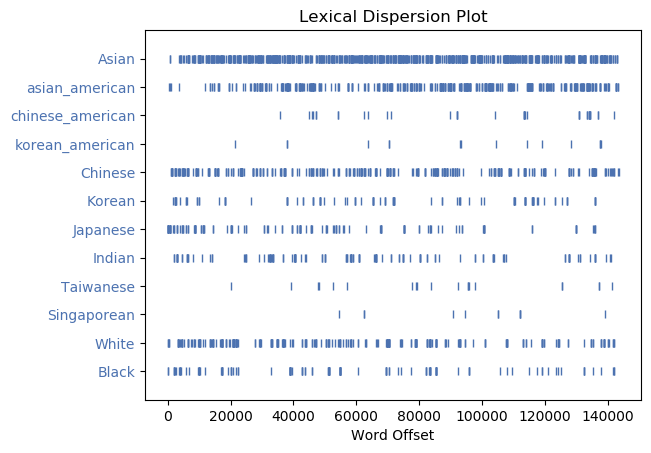

In [222]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['Asian','asian_american','chinese_american','korean_american','Chinese','Korean','Japanese','Indian','Taiwanese','Singaporean', 'White','Black'])
sns.set() #Re-enabling seaborn

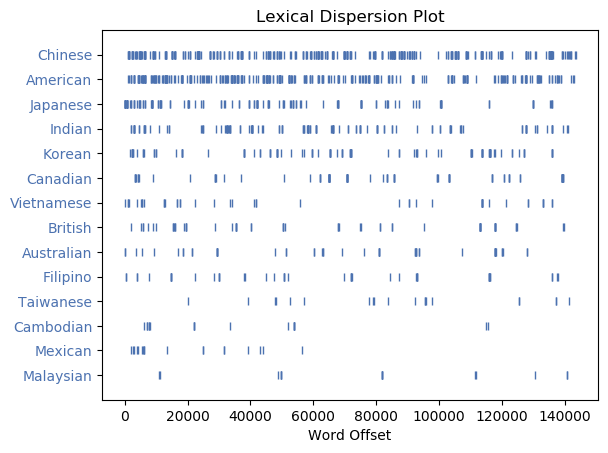

In [40]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['Chinese','American','Japanese','Indian','Korean','Canadian','Vietnamese','British','Australian','Filipino','Taiwanese','Cambodian','Mexican','Malaysian'])
sns.set() #Re-enabling seaborn

/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecate

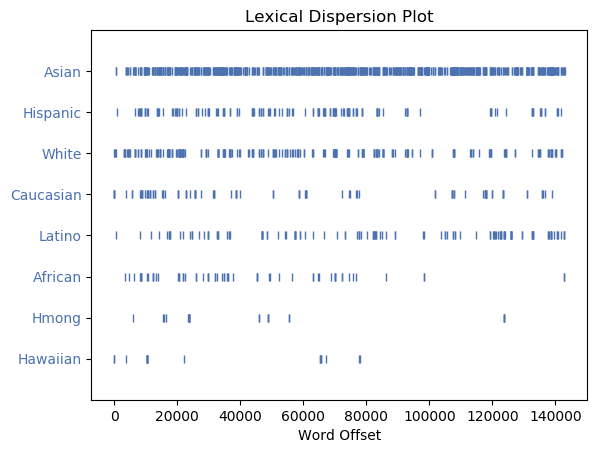

In [165]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['Asian','Hispanic','White','Caucasian','Latino','African','Hmong','Hawaiian'])
sns.set() #Re-enabling seaborn

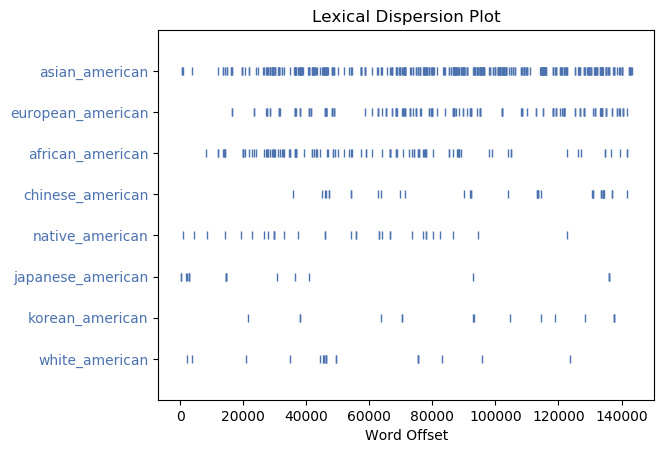

In [42]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['asian_american','european_american','african_american','chinese_american','native_american','japanese_american','korean_american','white_american'])
sns.set() #Re-enabling seaborn

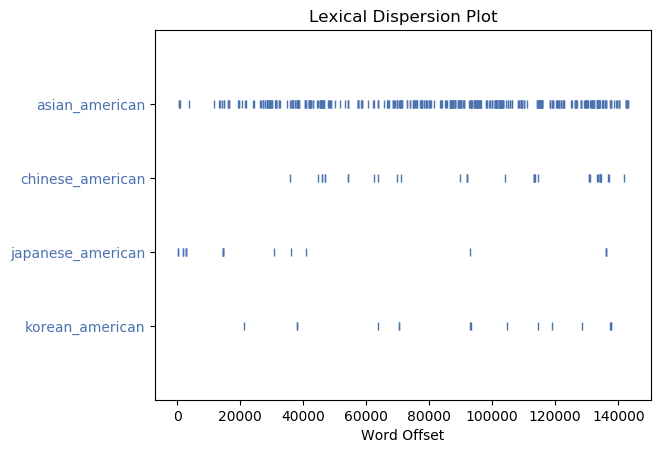

In [233]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['asian_american','chinese_american','japanese_american','korean_american'])
sns.set() #Re-enabling seaborn

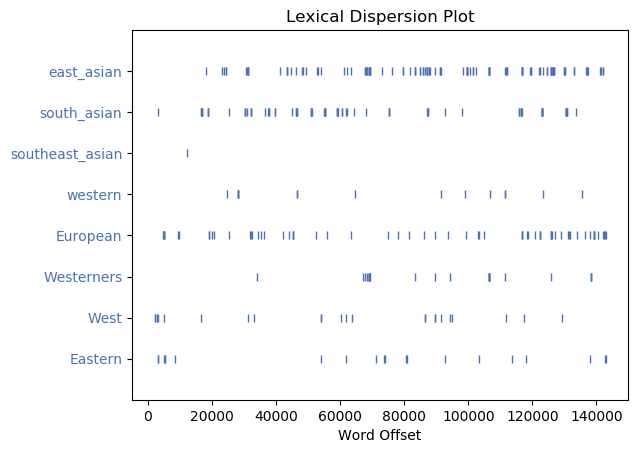

In [43]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['east_asian','south_asian','southeast_asian','western','European','Westerners','West','Eastern'])
sns.set() #Re-enabling seaborn

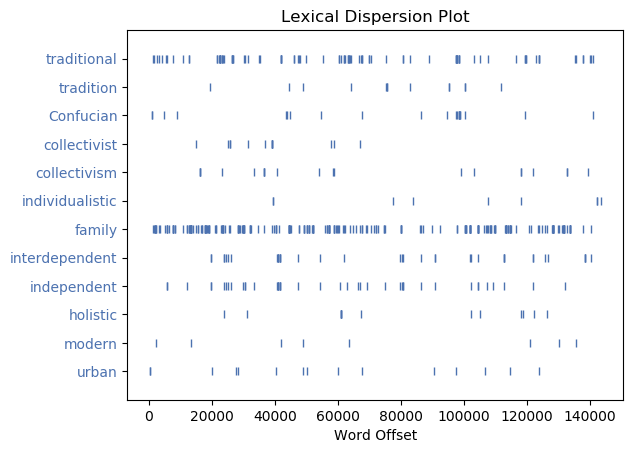

In [235]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['traditional','tradition','Confucian','collectivist','collectivism','individualistic','family','interdependent','independent','holistic','modern','urban'])
sns.set() #Re-enabling seaborn

# Week 5 

In [45]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip

#This will be doing most of the work
import networkx as nx

import sklearn #For generating some matrices
import pandas #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics

import pickle #if you want to save layouts
import os

%matplotlib inline

In [46]:
import pandas as df_w5
df_w5 = pandas.read_csv('combined_preprocessed_removed_1.csv')

In [47]:
import spacy
nlp = spacy.load("en")

In [48]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [49]:
df_w5['tokenized_text']=df_w5['Abstract'].apply(lambda x: word_tokenize(x))


In [50]:
#function to normalize the tokens
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized


In [51]:
# Normalizing the tokens
df_w5['normalized_tokens'] = df_w5['tokenized_text'].apply(lambda x: normalizeTokens(x))


In [52]:
#Checking the top count words
countsDict = {}
for word in df_w5['normalized_tokens'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('study', 862),
 ('asian', 856),
 ('group', 839),
 ('culture', 769),
 ('cultural', 695),
 ('ethnic', 572),
 ('social', 486),
 ('american', 467),
 ('health', 446),
 ('self', 445),
 ('asian_american', 437),
 ('result', 425),
 ('examine', 395),
 ('research', 371),
 ('difference', 370),
 ('chinese', 357),
 ('family', 350),
 ('white', 345),
 ('child', 326),
 ('woman', 323),
 ('racial', 309),
 ('high', 308),
 ('relationship', 305),
 ('identity', 297),
 ('factor', 294),
 ('report', 293),
 ('experience', 287),
 ('student', 286),
 ('participant', 285),
 ('support', 265),
 ('finding', 263),
 ('suggest', 261),
 ('effect', 252),
 ('measure', 250),
 ('use', 250),
 ('model', 243),
 ('find', 242),
 ('individual', 236),
 ('value', 235),
 ('level', 232),
 ('age', 231),
 ('behavior', 223),
 ('acculturation', 223),
 ('=', 223),
 ('analysis', 221),
 ('influence', 221),
 ('relate', 213),
 ('black', 208),
 ('race', 208),
 ('datum', 205)]

In [53]:
df_w5['tokenized_sents'] = df_w5['Abstract'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
df_w5['normalized_sents'] = df_w5['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])


In [54]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [55]:
#changed the number of rows (934)
g = wordCooccurrence(df_w5['normalized_sents'][:934].sum())

In [56]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized

In [57]:
import sklearn.feature_extraction


In [58]:
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence = senVectorizer.fit_transform(df_w5['Abstract'][834:934])


In [59]:
senVects_incidence.shape

(100, 2332)

In [60]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(senVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence[d, w]}) for d, w in zip(*senVects_incidence.nonzero())))

In [61]:
print(nx.info(g_2mode))

Name: 
Type: Graph
Number of nodes: 2432
Number of edges: 7077
Average degree:   5.8199


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8208 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

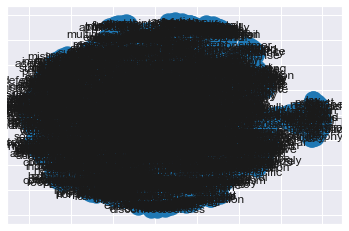

In [62]:
nx.draw_networkx(g_2mode)

## Two one-mode network

In [63]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [64]:
gDoc = contractNetwork(g_2mode, 'doc')

In [65]:
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 4922
Average degree:  98.4400


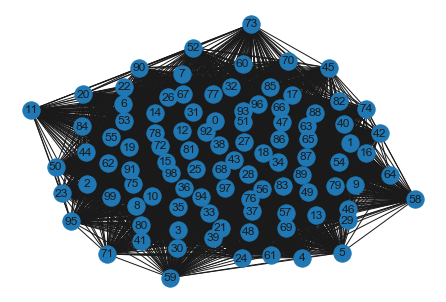

In [66]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

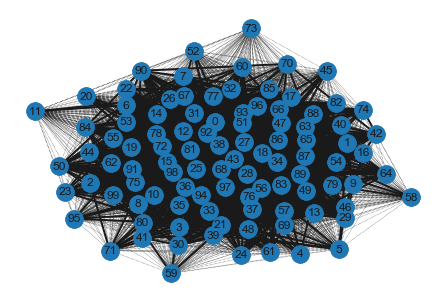

In [67]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

In [68]:
print(len(df.iloc[79]['Abstract']),"words:","\n",df.iloc[73]['Abstract'].strip().replace('  ', '\n'))

786 words: 
 Compared anxiety symptomatology (ANS) among 2 Cambodian refugee youth groups (aged 11–19 yrs). 71 Ss were in a Thailand camp awaiting resettlement to the US, and 48 Ss were permanently resettled there. The Ss completed the SCL-90 and the Youth Adaptation Rating Scale by S. Beall and G. Schmidt (see record [rid]1984-30412-001[/rid]). ANS was low in the Thailand group and was significantly higher in the US group. The country groups differed from each other significantly in terms of mean age and life events scores. Findings suggest recommendations for health care workers such as screening refugee youths to identify those who are particularly troubled and developing school programs for those with high symptom scores. The authors respond to J. G. Lipson and C. Paul's commentaries.


In [69]:
print(len(df.iloc[79]['Abstract']),"words:","\n",df.iloc[58]['Abstract'].strip().replace('  ', '\n'))

786 words: 
 Addresses obstacles that may arise in therapeutic relationships involving therapists and clients from the same ethnic background. The case of a Japanese-American adolescent and a Japanese-American therapist is used to develop the thesis that obvious similarities in race or culture may lead to invalid assumptions about shared beliefs and values, as well as countertransference manifestations that have the potential to disrupt or prevent the development of a working relationship.


## Semantic Network

I included this part in my final report.

In [70]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 2332
Number of edges: 210251
Average degree: 180.3182


In [71]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

1.2675278595583375

In [72]:
#changing the weight (original=25)
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])


In [73]:
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [74]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [75]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 76
Number of edges: 185
Average degree:   4.8684


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


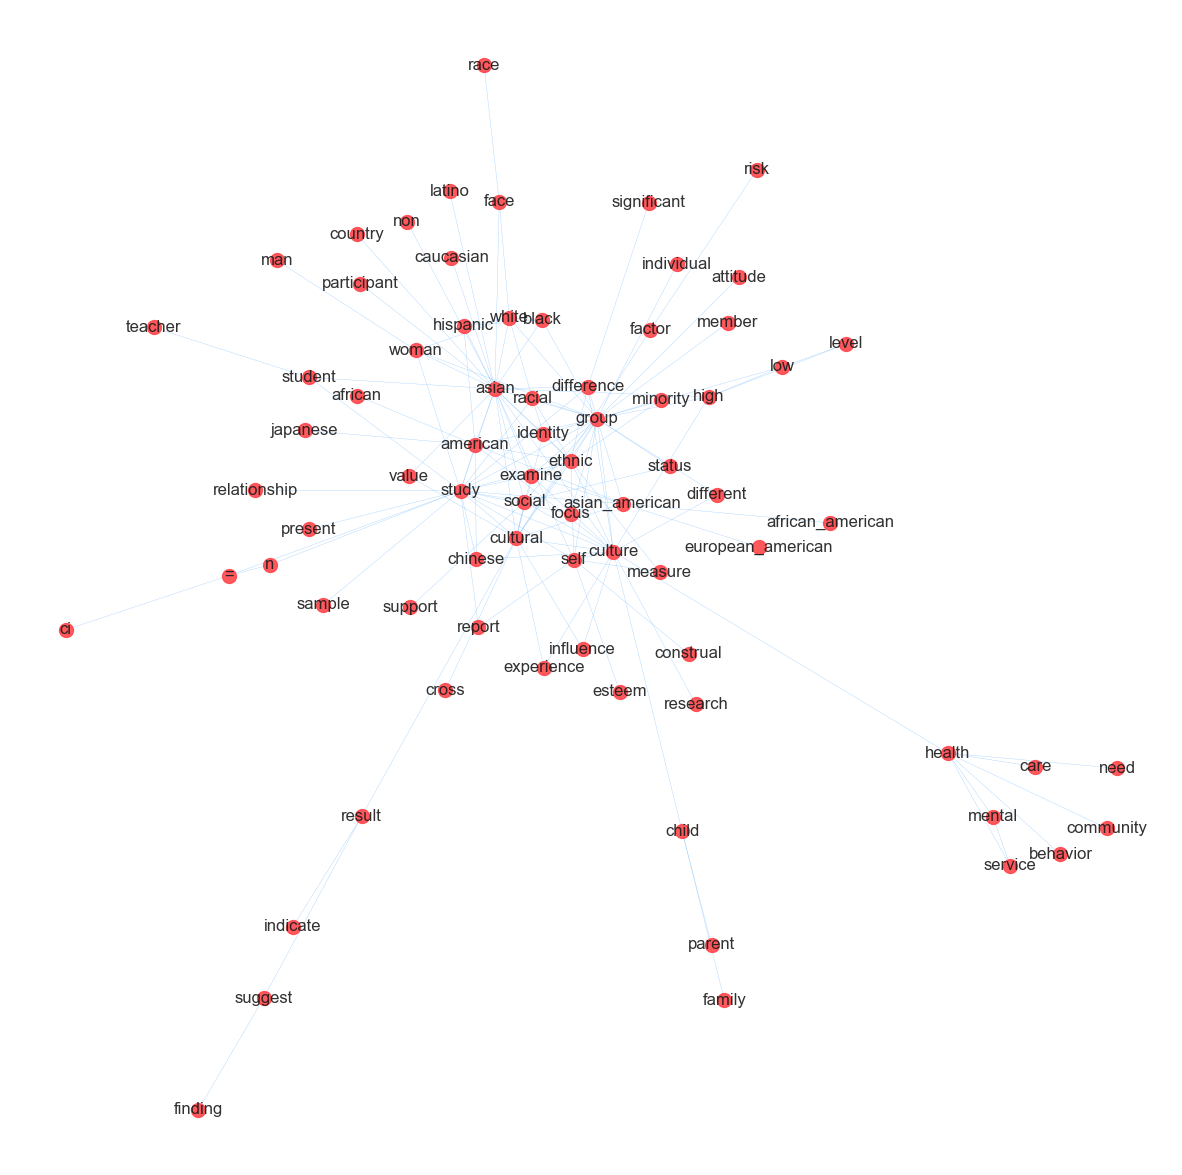

In [166]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (15,15))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [77]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))

In [78]:
### removing words that show up in many documents

In [79]:
giant = nx.Graph(giant)

In [80]:
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 2000]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 76
Number of edges: 185
Average degree:   4.8684


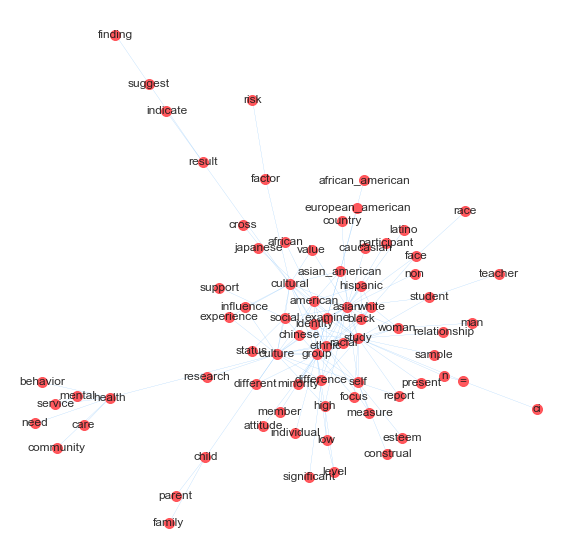

In [81]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [82]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

group, asian, culture, study, ethnic, cultural, examine


In [83]:
americanNeighbors = giant.neighbors('american')
g_american = giant.subgraph(americanNeighbors)
print(nx.info(g_american))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 34
Average degree:   6.1818


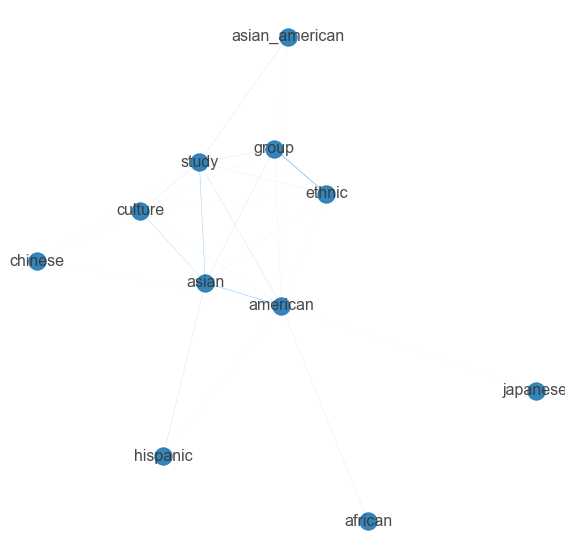

In [84]:
layout_amer = nx.spring_layout(g_american, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_american.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american.edges(data = True)))
nx.draw(g_american, ax = ax, pos = layout_amer, labels = {n:n for n in g_american.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

In [85]:
asianNeighbors = giant.neighbors('asian')
g_asian = giant.subgraph(asianNeighbors)
print(nx.info(g_asian))

Name: 
Type: Graph
Number of nodes: 25
Number of edges: 90
Average degree:   7.2000


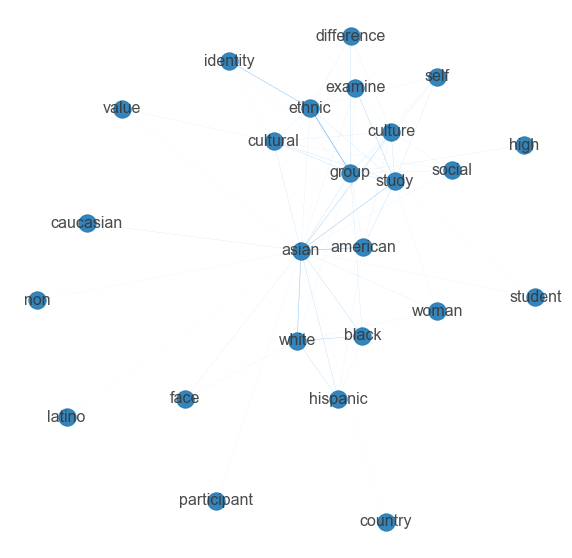

In [86]:
layout_amer = nx.spring_layout(g_asian, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_asian.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_asian.edges(data = True)))
nx.draw(g_asian, ax = ax, pos = layout_amer, labels = {n:n for n in g_asian.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_asian.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

In [87]:
americanNeighbors = gWord.neighbors('american')
americanNeighborsPlus1 = set(americanNeighbors)
for n in americanNeighbors:
    americanNeighborsPlus1 |= set(giant.neighbors(n))
    
#for x in americanNeighborsPlus1:
#    print(x)

In [88]:
g_american2 = giant.subgraph(americanNeighborsPlus1)
print(nx.info(g_american2))

Name: 
Type: Graph
Number of nodes: 67
Number of edges: 157
Average degree:   4.6866


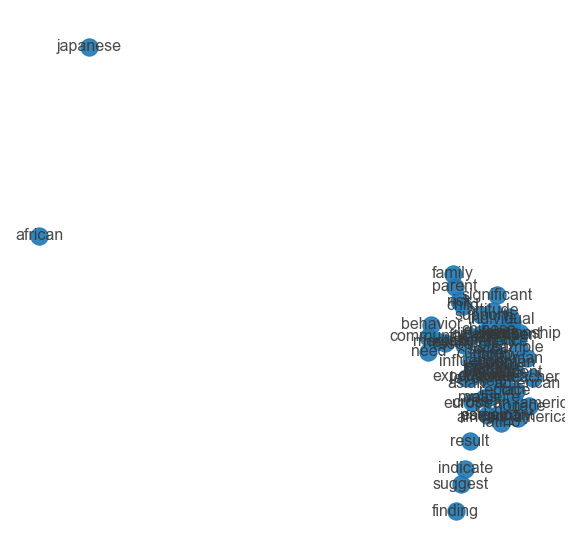

In [89]:
layout_amer = nx.spring_layout(g_american2, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
centralities_amer = nx.eigenvector_centrality(g_american2)
maxC = max(centralities_amer.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
nx.draw(g_american2, ax = ax, pos = layout_amer, labels = {n:n for n in g_american2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

# Week 6- Discovering Patterns: Clusters & Topics

For this section, I want to know if the data can be clustered in a meaningful way using the year of publication as a label.

In [90]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

### Converting to word count vectors

In [91]:
import pandas as df_w6
df_w6 = pandas.read_csv('combined_preprocessed_removed_1.csv')

In [92]:
#First it needs to be initialized
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
newsgroupsVects = ngCountVectorizer.fit_transform(df_w6['Abstract'])
print(newsgroupsVects.shape)

(934, 9633)


### TF-IDF

In [93]:
ngCountVectorizer.vocabulary_.get('vector')

In [94]:
#initialize
newsgroupsTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(newsgroupsVects)
#train
newsgroupsTF = newsgroupsTFTransformer.transform(newsgroupsVects)
print(newsgroupsTF.shape)

(934, 9633)


### Removing stopwords and stemming

In [95]:
#initialize
ngTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
newsgroupsTFVects = ngTFVectorizer.fit_transform(df_w6['Abstract'])


### Selecting the number of clusters

In [96]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


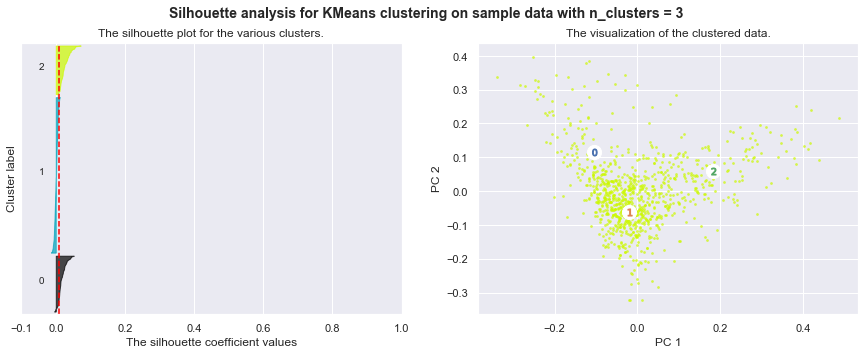

For n_clusters = 3, The average silhouette_score is : 0.008


In [160]:
X = newsgroupsTFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


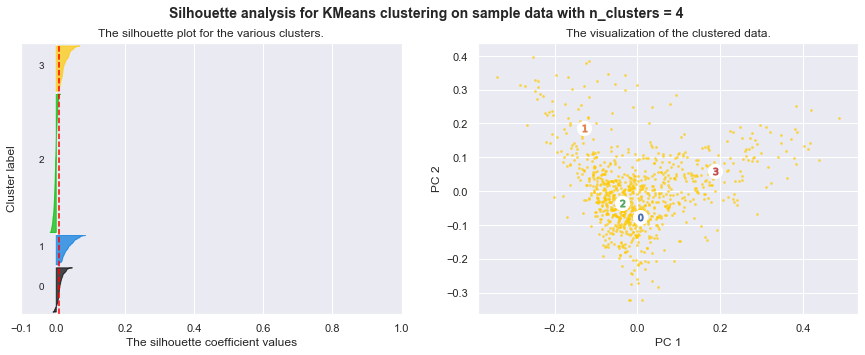

For n_clusters = 4, The average silhouette_score is : 0.009


In [161]:
X = newsgroupsTFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


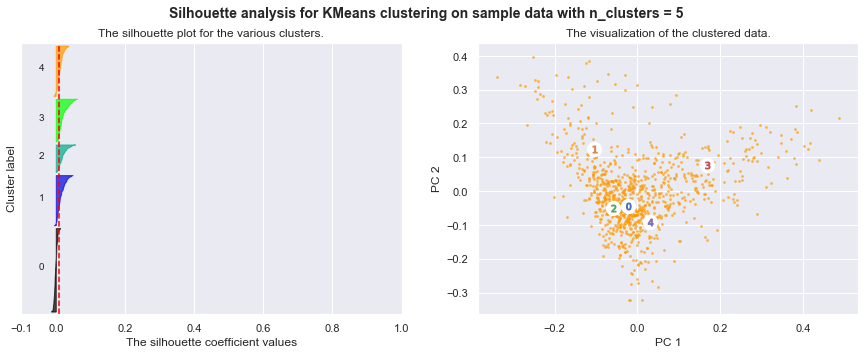

For n_clusters = 5, The average silhouette_score is : 0.010


In [162]:
X = newsgroupsTFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


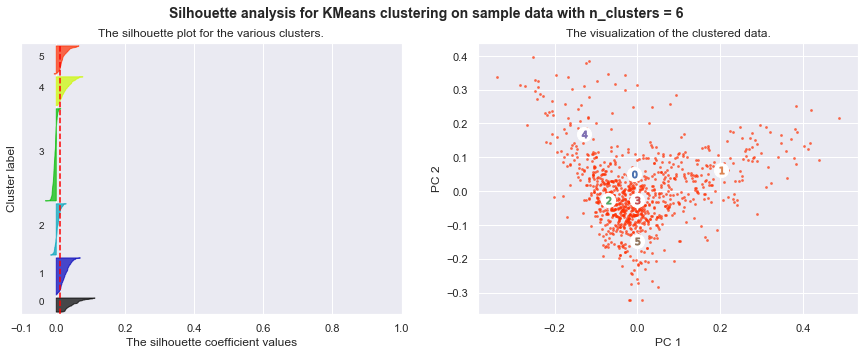

For n_clusters = 6, The average silhouette_score is : 0.012


In [163]:
X = newsgroupsTFVects.toarray()
plotSilhouette(6, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


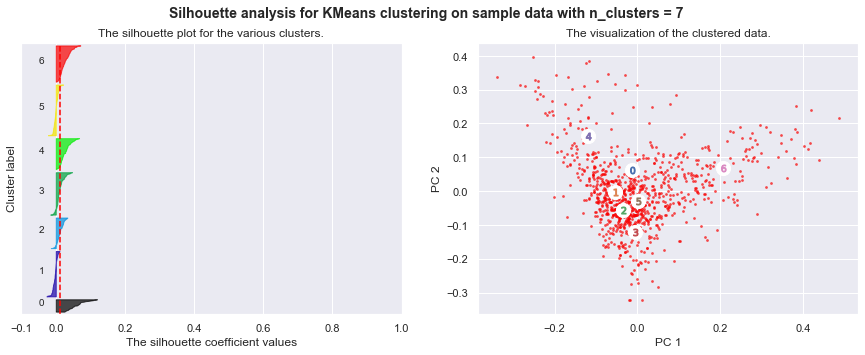

For n_clusters = 7, The average silhouette_score is : 0.013


In [164]:
X = newsgroupsTFVects.toarray()
plotSilhouette(7, X)

### Clustering

In [97]:
numClusters=5

In [98]:
#k-means++ is a better way of finding the starting points
#We could also try providing our own
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')


In [99]:
km.fit(newsgroupsTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [100]:
df_w6['kmeans_predictions'] = km.labels_


In [101]:
terms = ngTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind])
    print('\n')
    

Top terms per cluster:
Cluster 0:
 children
 parents
 child
 adolescents
 support
 american
 mothers
 social
 families
 family
 gender
 parental
 asian
 cultural
 indian


Cluster 1:
 white
 race
 racial
 faces
 black
 hispanic
 blacks
 asian
 groups
 ethnic
 data
 study
 identification
 non
 american


Cluster 2:
 health
 women
 care
 mental
 community
 services
 family
 patients
 risk
 asian
 ethnic
 factors
 social
 cultural
 research


Cluster 3:
 ethnic
 self
 asian_american
 identity
 acculturation
 group
 groups
 scale
 racial
 european_american
 asian
 study
 social
 cultural
 american


Cluster 4:
 cultural
 culture
 chinese
 asian
 students
 american
 cultures
 rid
 study
 research
 book
 social
 western
 language
 work




### Adding a new column for year

In [102]:
import pandas as pd
Type_new = pd.Series([]) 

for i in range(len(df_w6)): 
    if df_w6["Publication Date"][i] < 19800000: 
        Type_new[i]=0
  
    elif df_w6["Publication Date"][i] < 19900000: 
        Type_new[i]=1
  
    elif df_w6["Publication Date"][i] < 20000000: 
        Type_new[i]=2
        
    elif df_w6["Publication Date"][i] < 20100000: 
        Type_new[i]=3
  
    else: 
        Type_new[i]=4
        
# inserting new column with values of list made above         
df_w6.insert(4, "Year", Type_new) 

Created a column to divide the dataframe by ten years of publication.
<br>0 = 1970-1979 
<br>1 = 1980-1989
<br>2 = 1990-1999
<br>3 = 2000-2009
<br>4 = 2010-2019


In [103]:
print("For the clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_w6['Year'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_w6['Year'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_w6['Year'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_w6['Year'], km.labels_)))


For the clusters:
Homogeneity: 0.007
Completeness: 0.006
V-measure: 0.007
Adjusted Rand Score: 0.003


### Mapping clusters by year after reducing the data

In [104]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(newsgroupsTFVects.toarray())
reduced_data = pca.transform(newsgroupsTFVects.toarray())

In [105]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [106]:
colordict = {
0: 'black',
1: 'red',
2: 'orange',
3: 'green',
4: 'blue',
    }
colors = [colordict[c] for c in df_w6['Year']]
print("The categories' colors are:\n{}".format(colordict.items()))


The categories' colors are:
dict_items([(0, 'black'), (1, 'red'), (2, 'orange'), (3, 'green'), (4, 'blue')])


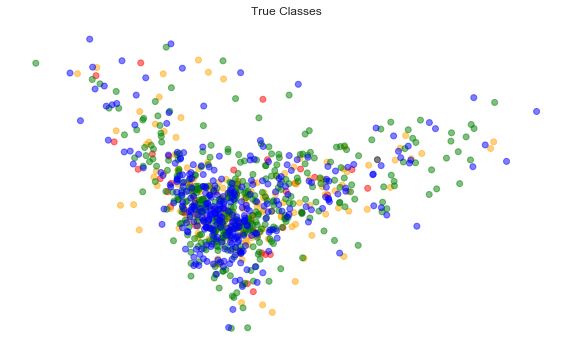

In [107]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

#### 1970-2009 vs. 2010-2019

In [225]:
colordict = {
0: 'blue',
1: 'blue',
2: 'blue',
3: 'blue',
4: 'red',
    }
colors = [colordict[c] for c in df_w6['Year']]
print("The categories' colors are:\n{}".format(colordict.items()))


The categories' colors are:
dict_items([(0, 'blue'), (1, 'blue'), (2, 'blue'), (3, 'blue'), (4, 'red')])


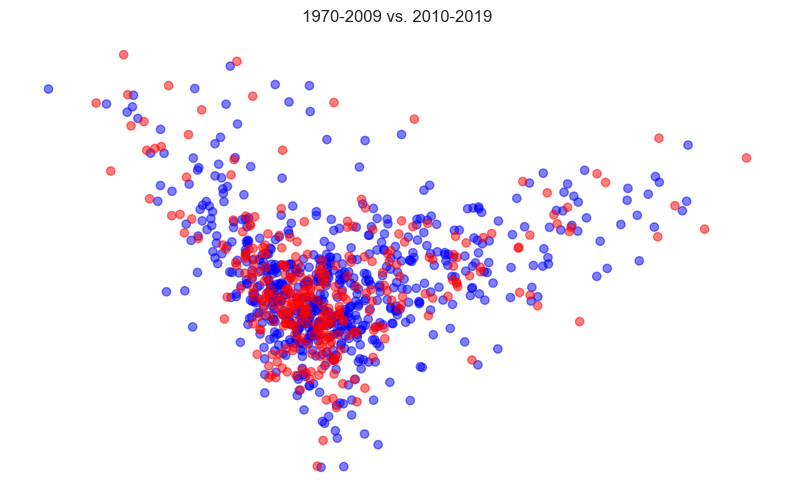

In [227]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('1970-2009 vs. 2010-2019')
plt.show()

#### 1970-1999 vs. 2000-2019

In [228]:
colordict = {
0: 'blue',
1: 'blue',
2: 'blue',
3: 'red',
4: 'red',
}
colors = [colordict[c] for c in df_w6['Year']]
print("The categories' colors are:\n{}".format(colordict.items()))


The categories' colors are:
dict_items([(0, 'blue'), (1, 'blue'), (2, 'blue'), (3, 'red'), (4, 'red')])


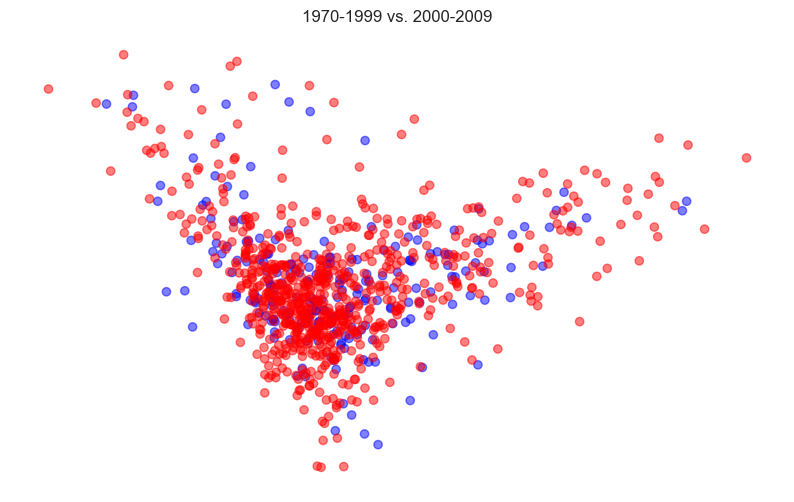

In [229]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('1970-1999 vs. 2000-2009')
plt.show()

#### 1970-1989 vs. 1990-2019

In [112]:
colordict = {
0: 'blue',
1: 'blue',
2: 'red',
3: 'red',
4: 'red',
    }
colors = [colordict[c] for c in df_w6['Year']]
print("The categories' colors are:\n{}".format(colordict.items()))


The categories' colors are:
dict_items([(0, 'blue'), (1, 'blue'), (2, 'red'), (3, 'red'), (4, 'red')])


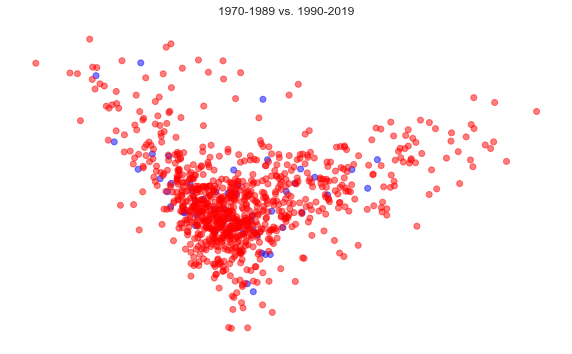

In [113]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('1970-1989 vs. 1990-2019')
plt.show()

### Predicted Clusters

In [230]:
colordict = {
0: 'black',
1: 'red',
2: 'orange',
3: 'green',
4: 'blue',
    }
colors = [colordict[c] for c in df_w6['Year']]
print("The categories' colors are:\n{}".format(colordict.items()))


The categories' colors are:
dict_items([(0, 'black'), (1, 'red'), (2, 'orange'), (3, 'green'), (4, 'blue')])


In [231]:
newsgroupsCategories=[0,1,2,3,4]
colors_p = [colordict[newsgroupsCategories[l]] for l in km.labels_]

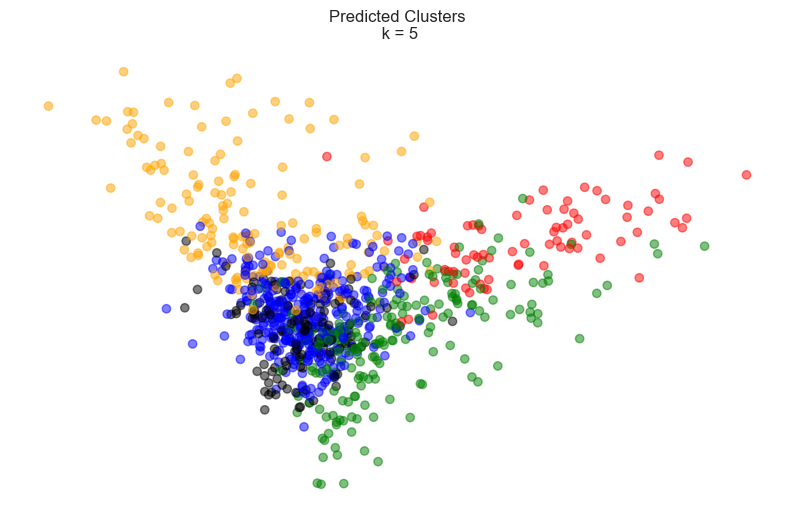

In [232]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 5')
plt.show()

## Topic modeling

Not having interesting findings from this analysis, I did not include this part in the final report. I actually found that tf-idf generated better topics that are more interpretable. 

### Gensim

In [116]:
#Apply our functions
df_w6['tokenized_text'] = df_w6['Abstract'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df_w6['normalized_tokens'] = df_w6['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))


In [117]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

df_w6['reduced_tokens'] = df_w6['normalized_tokens'].apply(lambda x: dropMissing(x, ngTFVectorizer.vocabulary_.keys()))


In [118]:
dictionary = gensim.corpora.Dictionary(df_w6['reduced_tokens'])

### Creating a list of tuples

In [119]:
corpus = [dictionary.doc2bow(text) for text in df_w6['reduced_tokens']]

In [120]:
gensim.corpora.MmCorpus.serialize('abstract.mm', corpus)
senmm = gensim.corpora.MmCorpus('abstract.mm')

In [121]:
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')

In [122]:
sen1Bow = dictionary.doc2bow(df_w6['reduced_tokens'][:0])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(df_w6['Article Title'][:0]))
print("are: {}".format(sen1lda))

The topics of the text: Series([], Name: Article Title, dtype: object)
are: [(0, 0.2297975), (1, 0.16358785), (2, 0.22108948), (3, 0.17417698), (4, 0.21134822)]


In [123]:
ldaDF = pandas.DataFrame({
        'Article Title' : df_w6['Article Title'],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in df_w6['reduced_tokens']]
    })

In [124]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

Article Title  \
1                     Reactions to racial trespassing.   
101  Effects of contact, conflict, and social ident...   
201  Culture and the construal of agency: Attributi...   
301  Ethnicity, coping, and distress among Korean A...   
401  Cultural influences on student's perceptions o...   
501  'If I Ever Play Football, Dad, Can I Play for ...   
601  Testing a multiple mediation model of Asian Am...   
701  Misogyny, acculturation, and ethnic identity: ...   
801  Ethnic variations between Asian and European A...   
901  East Asian young and older adult perceptions o...   

                                                topics   topic_0   topic_1  \
1                                     [(4, 0.9810758)]  0.000000  0.000000   
101  [(0, 0.21821702), (2, 0.34705842), (4, 0.429186)]  0.218217  0.000000   
201                  [(0, 0.4961684), (2, 0.49079126)]  0.496168  0.000000   
301                                   [(2, 0.9878532)]  0.000000  0.000000   
401                 [(3, 0.83875585), (4, 0.15173967)]  0.000000  0.000000   
501                 [(1, 0.78085303), (4, 0.20323181)]  0.000000  0.780853   
601                                  [(2, 0.98140216)]  0.000000  0.000000   
701                  [(0, 0.1833468), (2, 0.80352354)]  0.183347  0.000000   
801                                   [(4, 0.9859042)]  0.000000  0.000000   
901                                   [(1, 0.9923247)]  0.000000  0.992325   

      topic_2   topic_3   topic_4  
1    0.000000  0.000000  0.981076  
101  0.347058  0.000000  0.429186  
201  0.490791  0.000000  0.000000  
301  0.987853  0.000000  0.000000  
401  0.000000  0.838756  0.151740  
501  0.000000  0.000000  0.203232  
601  0.981402  0.000000  0.000000  
701  0.803524  0.000000  0.000000  
801  0.000000  0.000000  0.985904  
901  0.000000  0.000000  0.000000

In [125]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(5)]]
ldaDFVisN = ldaDF[:10][['Article Title']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

topic_0   topic_1   topic_2   topic_3   topic_4
0  0.000000  0.000000  0.981801  0.000000  0.000000
1  0.000000  0.000000  0.000000  0.000000  0.981076
2  0.010976  0.655725  0.010459  0.000000  0.314780
3  0.000000  0.000000  0.981796  0.000000  0.000000
4  0.000000  0.118825  0.000000  0.695395  0.174535
5  0.000000  0.760301  0.000000  0.211007  0.000000
6  0.000000  0.988966  0.000000  0.000000  0.000000
7  0.000000  0.969457  0.013185  0.000000  0.000000
8  0.000000  0.000000  0.976744  0.000000  0.000000
9  0.000000  0.770748  0.000000  0.207422  0.000000

### Visualization

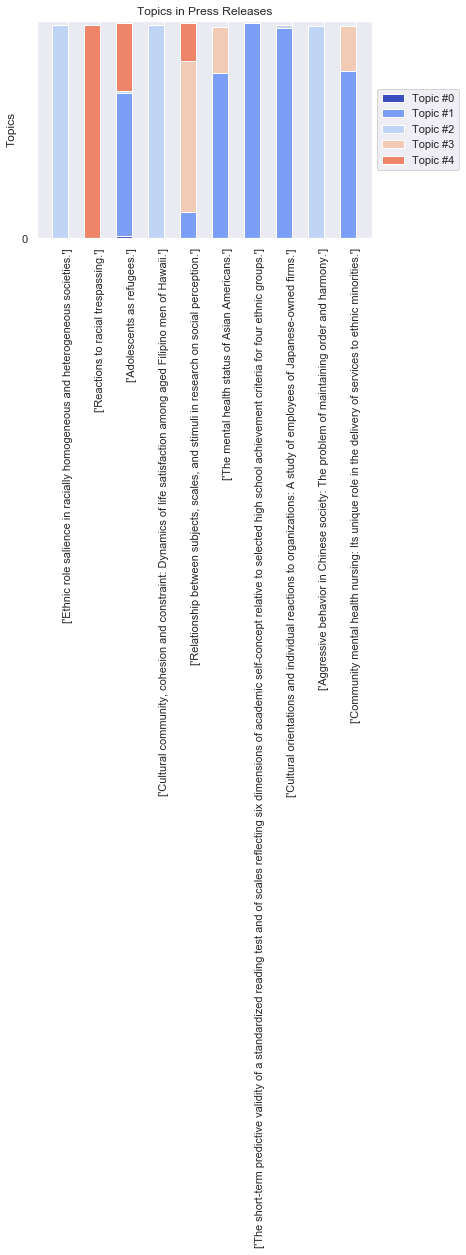

In [126]:
N = 10
ind = np.arange(N)
K = senlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

### Heatmap

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]


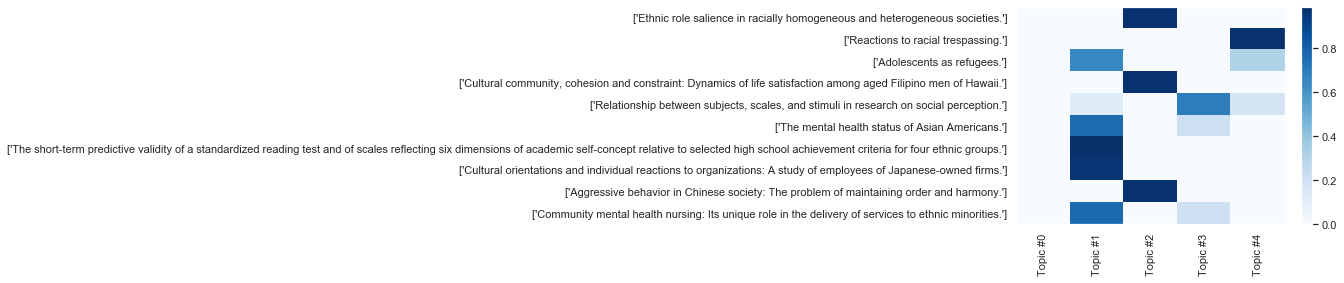

In [127]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [128]:
senlda.show_topic(1)

[('study', 0.0144558735),
 ('american', 0.014382653),
 ('culture', 0.013599435),
 ('asian', 0.013109244),
 ('cultural', 0.012229085),
 ('self', 0.0102997385),
 ('group', 0.01015205),
 ('chinese', 0.009964578),
 ('emotion', 0.009243278),
 ('result', 0.008838086)]

In [129]:
topicsDict = {}
for topicNum in range(senlda.num_topics):
    topicWords = [w for w, p in senlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0   Topic_1   Topic_2       Topic_3   Topic_4
0           asian     study     study       culture     group
1        cultural  american    social         asian    ethnic
2           study   culture     group        health     study
3         culture     asian   culture         group  cultural
4           group  cultural     asian        ethnic     child
5        american      self  research         study     asian
6          family     group  cultural         white      self
7          social   chinese    ethnic       student    health
8           white   emotion   examine       examine    racial
9  asian_american    result    result  relationship   culture

### Probability distribution

Text(0.5, 1.0, 'Probability Distribution of Words, Topic 0')

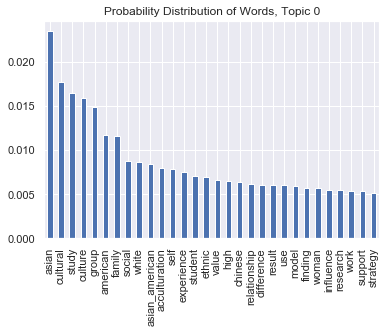

In [130]:
topic0_df = pandas.DataFrame(senlda.show_topic(0, topn=30))
ax0=topic0_df.plot.bar(x=0, y=1, rot=90, legend=False)
ax0.xaxis.set_label_text("")
plt.title('Probability Distribution of Words, Topic 0')


Text(0.5, 1.0, 'Probability Distribution of Words, Topic 1')

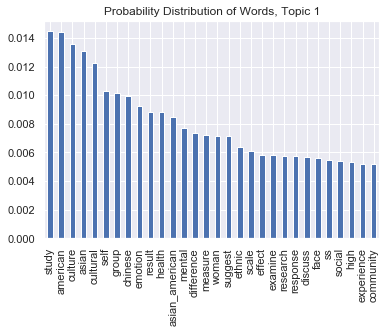

In [131]:
topic1_df = pandas.DataFrame(senlda.show_topic(1, topn=30))
ax1=topic1_df.plot.bar(x=0, y=1, rot=90, legend=False)
ax1.xaxis.set_label_text("")
plt.title('Probability Distribution of Words, Topic 1')


Text(0.5, 1.0, 'Probability Distribution of Words, Topic 2')

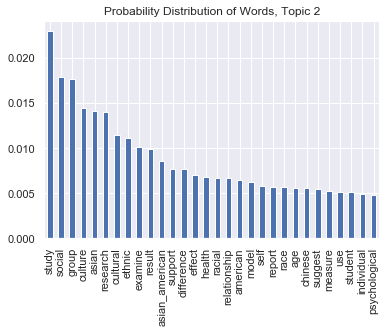

In [132]:
topic2_df = pandas.DataFrame(senlda.show_topic(2, topn=30))
ax2=topic2_df.plot.bar(x=0, y=1, rot=90, legend=False)
ax2.xaxis.set_label_text("")
plt.title('Probability Distribution of Words, Topic 2')


Text(0.5, 1.0, 'Probability Distribution of Words, Topic 3')

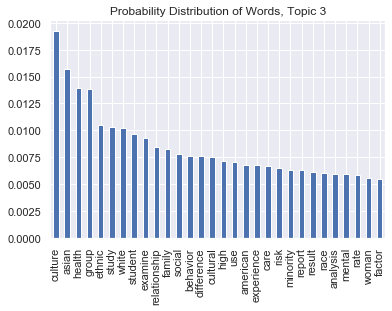

In [133]:
topic3_df = pandas.DataFrame(senlda.show_topic(3, topn=30))
ax3=topic3_df.plot.bar(x=0, y=1, rot=90, legend=False)
ax3.xaxis.set_label_text("")
plt.title('Probability Distribution of Words, Topic 3')


Text(0.5, 1.0, 'Probability Distribution of Words, Topic 4')

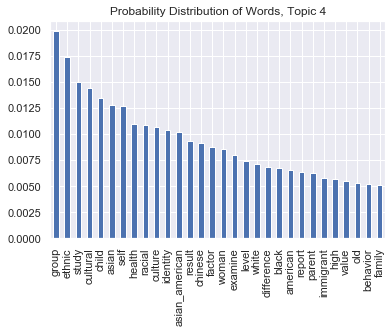

In [134]:
topic4_df = pandas.DataFrame(senlda.show_topic(4, topn=30))
ax4=topic4_df.plot.bar(x=0, y=1, rot=90, legend=False)
ax4.xaxis.set_label_text("")
plt.title('Probability Distribution of Words, Topic 4')


# Week 7

In [135]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [136]:
df_w7 = pandas.read_csv('combined_preprocessed_removed_1.csv')


In [137]:
#Apply our functions, notice each row is a list of lists now
df_w7['tokenized_sents'] = df_w7['Abstract'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
df_w7['normalized_sents'] = df_w7['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])


In [138]:
senReleasesW2V = gensim.models.word2vec.Word2Vec(df_w7['normalized_sents'].sum())

## Similar words

In [139]:
senReleasesW2V.most_similar('asian')

[('american', 0.9997301697731018),
 ('latino', 0.9996920824050903),
 ('african_american', 0.9995300769805908),
 ('african', 0.9995256066322327),
 ('non', 0.9991070032119751),
 ('woman', 0.9987944960594177),
 ('white', 0.9986640214920044),
 ('caucasian', 0.998630940914154),
 ('black', 0.9983606338500977),
 ('pacific_islander', 0.9982813596725464)]

In [140]:
senReleasesW2V.most_similar('chinese')

[('korean', 0.9998377561569214),
 ('vietnamese', 0.9998237490653992),
 ('high_school', 0.9998054504394531),
 ('japanese', 0.999799370765686),
 ('adult', 0.9997944831848145),
 ('youth', 0.9997655749320984),
 ('adolescent', 0.9997643828392029),
 ('british', 0.9997521042823792),
 ('canadian', 0.9997502565383911),
 ('complete', 0.9997400045394897)]

In [141]:
senReleasesW2V.most_similar('chinese_american')

[('korean', 0.9998051524162292),
 ('east_asian', 0.9997484683990479),
 ('complete', 0.9997435808181763),
 ('high_school', 0.9997345805168152),
 ('participate', 0.9997185468673706),
 ('south_asian', 0.9997103214263916),
 ('survey', 0.9997094869613647),
 ('vietnamese', 0.9997081756591797),
 ('college', 0.9997019171714783),
 ('british', 0.999693751335144)]

In [142]:
senReleasesW2V.most_similar('american')

[('asian', 0.9997302293777466),
 ('latino', 0.9995452165603638),
 ('african_american', 0.9994588494300842),
 ('african', 0.9994323253631592),
 ('woman', 0.9988172650337219),
 ('non', 0.9987894296646118),
 ('caucasian', 0.9986444711685181),
 ('white', 0.9983218908309937),
 ('college_student', 0.9982973337173462),
 ('pacific_islander', 0.9981892108917236)]

In [167]:
senReleasesW2V.most_similar('european')

[('compare', 0.9998450875282288),
 ('participant', 0.9998412728309631),
 ('undergraduate', 0.999773383140564),
 ('indian', 0.9997548460960388),
 ('japanese', 0.9997393488883972),
 ('british', 0.9997352361679077),
 ('anglo', 0.9997238516807556),
 ('korean', 0.9997004270553589),
 ('chinese', 0.9996837377548218),
 ('likely', 0.9996784925460815)]

From the current analysis, it seems that "Asian" is used as a race more than a group of countries in the same continent. 

In [143]:
senReleasesW2V.doesnt_match(['chinese', 'korean', 'japanese', 'vietnamese','indian', 'chinese_american'])


'indian'

This shows the least similar word to the rest of the words in the list. 

In [144]:
senReleasesW2V.most_similar(positive=['culture', 'chinese'], negative = ['korean'])


[('belief', 0.9997023344039917),
 ('understand', 0.9996618032455444),
 ('family', 0.9996451139450073),
 ('interpersonal', 0.9996339678764343),
 ('parental', 0.9996336698532104),
 ('value', 0.9996331930160522),
 ('problem', 0.9996318817138672),
 ('process', 0.9996316432952881),
 ('strategy', 0.9996292591094971),
 ('behavior', 0.9996286034584045)]

## Visualizing the vectors

### Dimension reduction

In [145]:
numWords = 50
targetWords = senReleasesW2V.wv.index2word[:numWords]

In [146]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(senReleasesW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.5700412 ,  0.30434802,  0.15897103, ..., -0.0181104 ,
         0.36793464,  0.1665865 ],
       [ 0.5735912 ,  0.26292878,  0.11840541, ..., -0.01819126,
         0.3623394 ,  0.20723708],
       [ 0.58173186,  0.26321134,  0.10315967, ...,  0.01358561,
         0.37901598,  0.14973994],
       ...,
       [ 0.5370726 ,  0.21868141,  0.09289425, ..., -0.00689076,
         0.33054036,  0.2128236 ],
       [ 0.56419516,  0.27251974,  0.10314818, ..., -0.00724372,
         0.3818822 ,  0.1512778 ],
       [ 0.656133  ,  0.33639377,  0.15170497, ..., -0.00870432,
         0.43557033,  0.17142425]], dtype=float32)

In [147]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

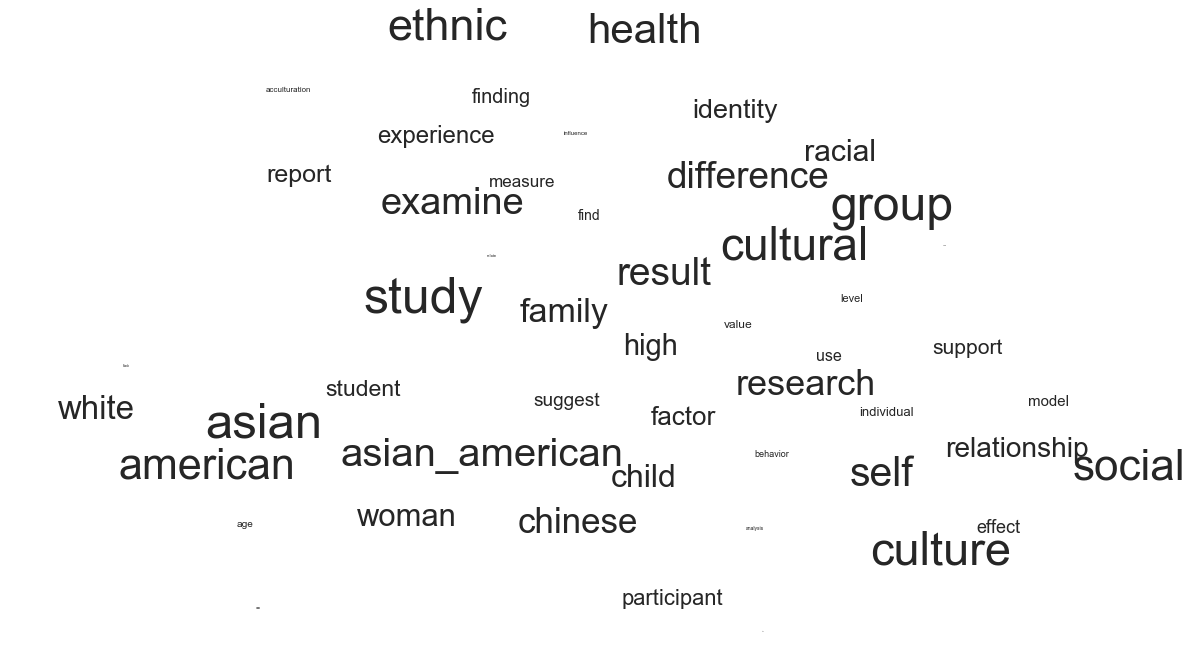

In [148]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  50 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

## Word2Vec

In [149]:
senReleasesW2V = gensim.models.word2vec.Word2Vec(df_w7['normalized_sents'].sum())


In [150]:
#words to create dimensions
tnytTargetWords = ['black', 'white','european', 'caucasian', 'asian', 'american','chinese', 'korean', 'japanese', 'indian', 'singaporean','vietnamese','chinese_american','korean_american','japanese_american','asian_american','european_american','east_asian','south_asian']
#words we will be mapping
tnytTargetWords += ["value","personality","relationship","culture","independent", "interdependent","traditional","tradition","modern","confucian", "depression", "industry", "urban", "rural",'middle']


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(senReleasesW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [151]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 34).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNYT = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

### Visualizing the semantic space

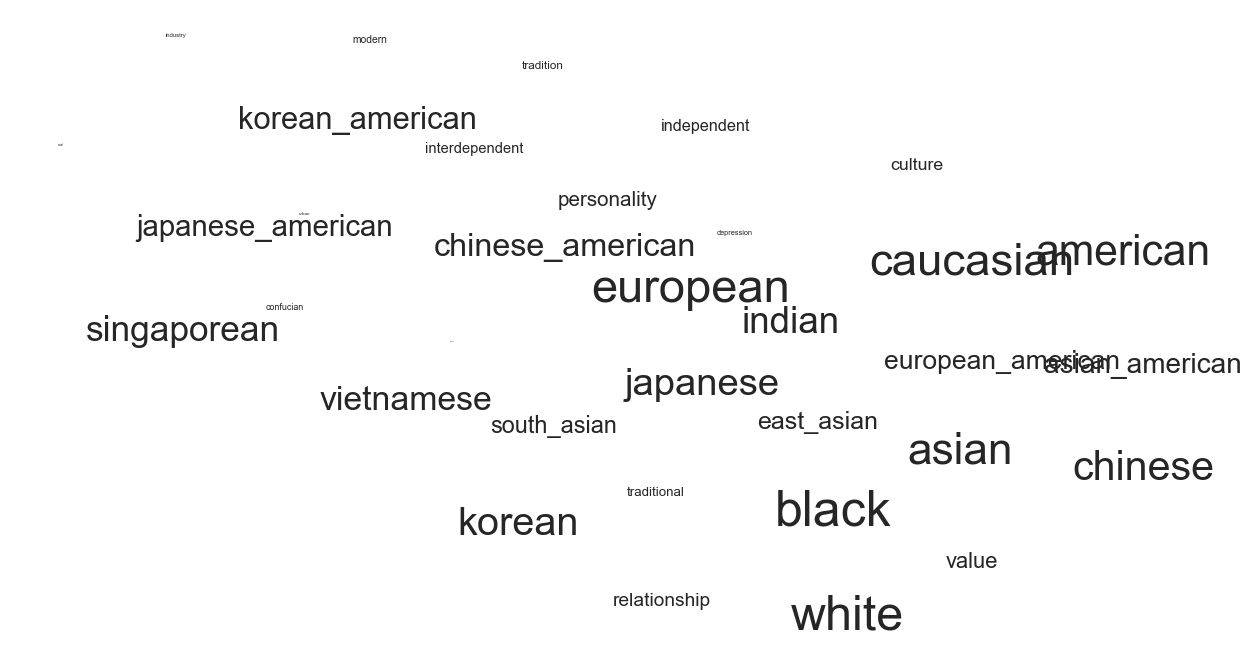

In [152]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

### Dimensionality: country, race, immigrants

In [243]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [244]:
Country = dimension(senReleasesW2V, ['chinese','japanese','indian','korean','vietnamese'],['american','canadian','british','australian'])
Race = dimension(senReleasesW2V, ['asian','east_asian','southeast_asian'],['european','white','caucasian'])
Immigrants = dimension(senReleasesW2V, ['asian_american','chinese_american','korean_american','japanese_american'],['european_american'])
                                         
    #traditional','Confucian','family','interdependent','independent','holistic','individual','modern','urban'

In [245]:
characteristic1 =['interdependent','traditional','tradition','family','confucian','independent','individualistic','collectivism','objective','urban','modern']
#characteristic2=['independent','individual','objective','urban','modern']


In [246]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(senReleasesW2V[word].reshape(1,-1), Country.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(senReleasesW2V[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(senReleasesW2V[word].reshape(1,-1), American.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'Country': g, 'Race': r, 'Immigrants': c}, index = word_list)
    return df

In [247]:
df_1 = makeDF(senReleasesW2V, characteristic1) 
#df_2 = makeDF(senReleasesW2V, characteristic2)
#Sportsdf = makeDF(nytimes_model, Sports)

In [248]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

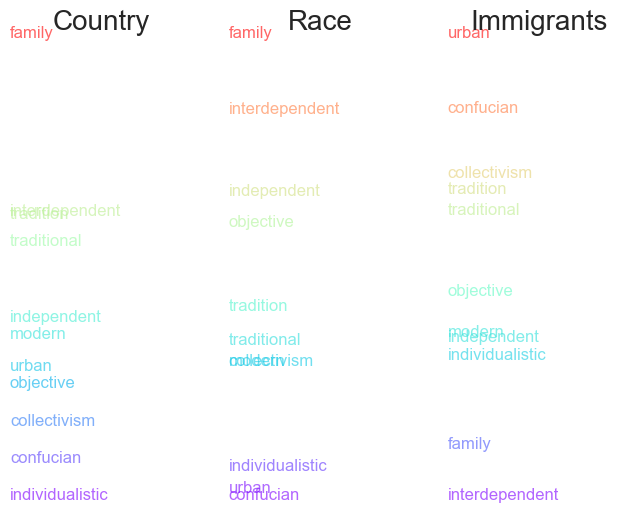

In [249]:
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, df_1, 'Country')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, df_1, 'Race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, df_1, 'Immigrants')
plt.show()


# Descriptive 

## Number of publication by year

In [182]:
df['Publication_year'] = df['Publication Date'].mod(10**8-10**4)\
   .dropna()\
   .astype(int)\
   .astype(str)

In [183]:
operationTwo = df['Publication Date']
operationTwo = operationTwo // 10000
print(operationTwo)

0      1977
1      1978
2      1979
3      1979
4      1979
       ... 
929    2019
930    2019
931    2019
932    2019
933    2019
Name: Publication Date, Length: 934, dtype: int64


In [184]:
df['Publication_year']=operationTwo

In [185]:
df['Publication_year'] = df['Publication_year'].apply(str)


In [186]:
year=df['Publication_year']

In [187]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(year)

In [ ]:
lists = sorted(counted.items()) # sorted by key, return a list of tuples


In [210]:
pandas.DataFrame(lists)

0   1
0   1977   1
1   1978   1
2   1979   3
3   1980   2
4   1981   2
5   1982   5
6   1983   4
7   1984   4
8   1985   7
9   1986   7
10  1987   7
11  1988   7
12  1989   5
13  1990   8
14  1991   7
15  1992  15
16  1993  13
17  1994  13
18  1995  16
19  1996  20
20  1997  20
21  1998  25
22  1999  26
23  2000  47
24  2001  59
25  2002  60
26  2003  51
27  2004  35
28  2005  28
29  2006  30
30  2007  33
31  2008  28
32  2009  28
33  2010  29
34  2011  31
35  2012  43
36  2013  37
37  2014  33
38  2015  46
39  2016  26
40  2017  19
41  2018  24
42  2019  29

Text(0.5, 1.0, '# of Articles Published by Year')

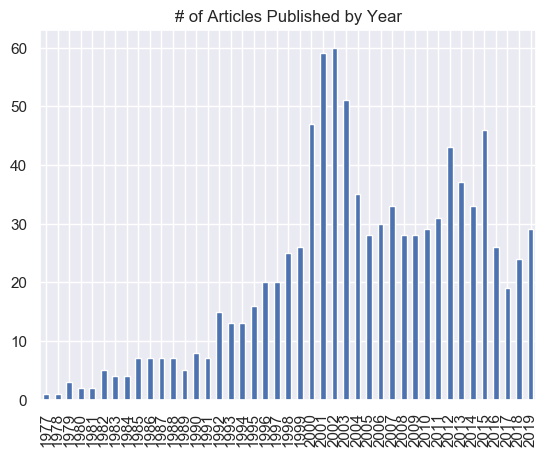

In [209]:
year = pandas.DataFrame(lists)
axyear=year.plot.bar(x=0, y=1, rot=90, legend=False)
axyear.xaxis.set_label_text("")
plt.title('# of Articles Published by Year')


## Number of articles published every ten years

In [212]:
everytenyear=df_w6["Year"]

In [213]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_ten = count_elements(everytenyear)

In [214]:
lists_ten = sorted(counted_ten.items()) # sorted by key, return a list of tuples


In [215]:
pandas.DataFrame(lists_ten)

0    1
0  0    5
1  1   50
2  2  163
3  3  399
4  4  317